In [19]:
import pandas as pd
import matplotlib as plt 
import seaborn as snb
import altair as alt

In [18]:
insurance_df = pd.read_csv('insurance2.csv', sep=',')
insurance_df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


## 1-Quantos clientes são fumantes?

In [72]:
smokers_df = insurance_df['smoker'] == 1
smokers_df = insurance_df[smokers_df]
smokers_df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
11,62,0,26.290,0,1,2,27808.72510,1
14,27,1,42.130,0,1,2,39611.75770,1
19,30,1,35.300,0,1,3,36837.46700,1
23,34,0,31.920,1,1,0,37701.87680,1
...,...,...,...,...,...,...,...,...
1313,19,0,34.700,2,1,3,36397.57600,1
1314,30,0,23.655,3,1,1,18765.87545,0
1321,62,1,26.695,0,1,0,28101.33305,1
1323,42,0,40.370,2,1,2,43896.37630,1


## 2-Quantos fumantes por região?

In [77]:
smkr_chart = pd.DataFrame(columns=['regiaoao'])

In [86]:
smoker_reg = smokers_df.groupby('region', as_index = False).count()[['region', 'smoker']]
smoker_reg['Nome Regiao'] = smoker_reg['region'].apply(
    lambda x: 'Nordeste' if x == 0 else ('Noroeste' if x == 1 else( 'Sudeste' if x == 2 else 'Sudoeste'))  
)
smoker_reg

,region,smoker,Nome Regiao
0,0,67,Nordeste
1,1,58,Noroeste
2,2,91,Sudeste
3,3,58,Sudoeste


In [87]:
alt.Chart(smoker_reg, title="Quantidade de fumantes por região").mark_bar().encode(
    x = alt.X('Nome Regiao', title="Região"),
    y = alt.Y('smoker', title="Fumantes"),
    color = alt.Color('region')
).interactive()

alt.Chart(...)

## 3-Histograma das Idades

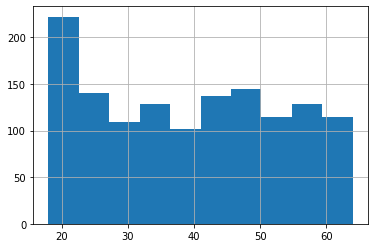

In [91]:
idade_df =  insurance_df['age']
idade_df.hist()

## 4-Relação idade custo